In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [5]:
nyt_df = pd.read_csv("../../data/nyt/covid-19-data-master/us-counties.csv")

In [6]:
nyt_df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [7]:
all_county_pop_df = pd.read_csv("../../data/Demographics/all_county_pop.csv",encoding='latin-1')

all_county_pop_df = all_county_pop_df[["STNAME","CTYNAME","POPESTIMATE2019"]]
counties = list(all_county_pop_df["CTYNAME"])
counties = [x.split(" ")[0] for x in counties]
all_county_pop_df["CTYNAME"] = counties
# add fip



In [8]:
combined_df = pd.merge(nyt_df, all_county_pop_df,  how='left', left_on=['state','county'], right_on = ['STNAME','CTYNAME'])
combined_df = combined_df.drop(['STNAME', 'CTYNAME'], axis=1) 

In [10]:
combined_df.head()

,date,county,state,fips,cases,deaths,POPESTIMATE2019
0,2020-01-21,Snohomish,Washington,53061.0,1,0,822083.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0,822083.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0,822083.0
3,2020-01-24,Cook,Illinois,17031.0,1,0,5150233.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0,822083.0


In [11]:

ids = list(set(combined_df["fips"]))
ids = [x for x in ids if str(x) != "nan"]

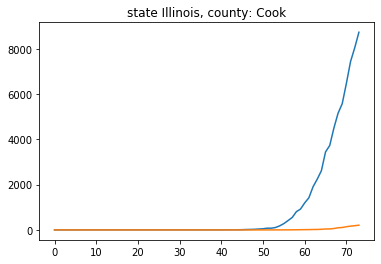

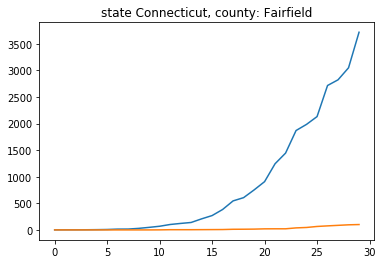

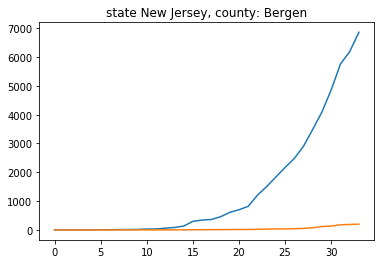

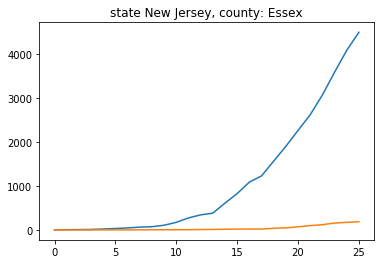

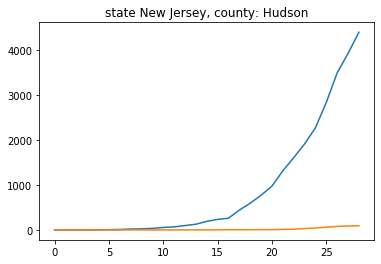

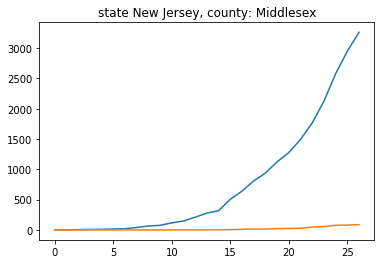

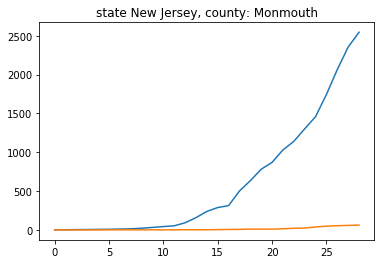

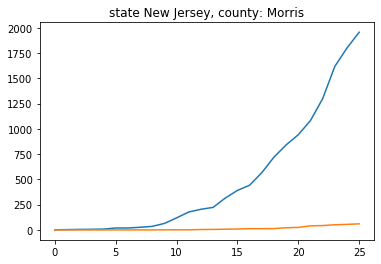

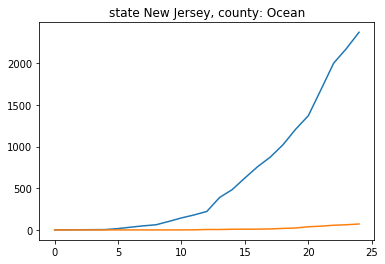

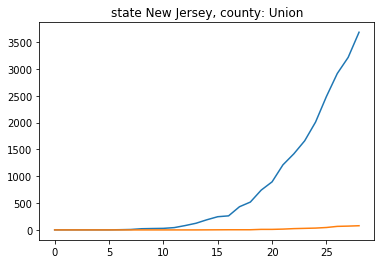

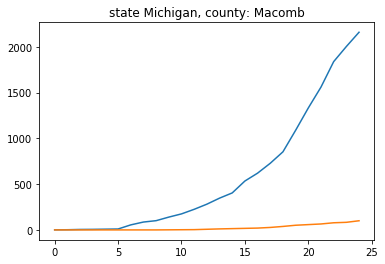

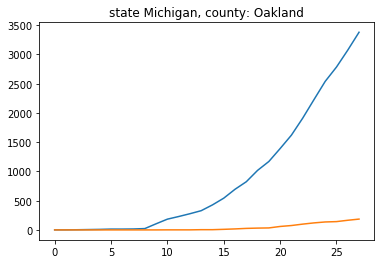

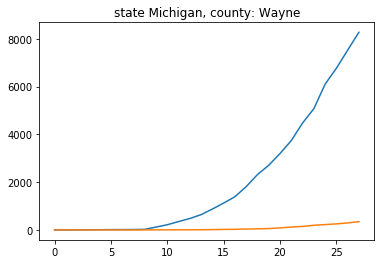

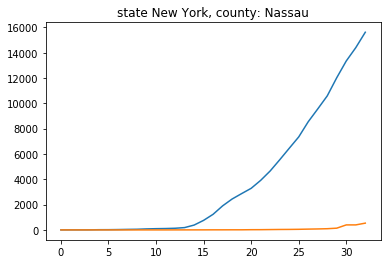

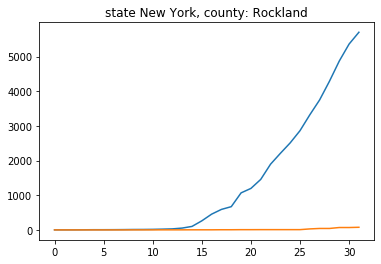

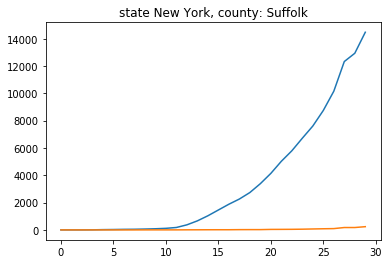

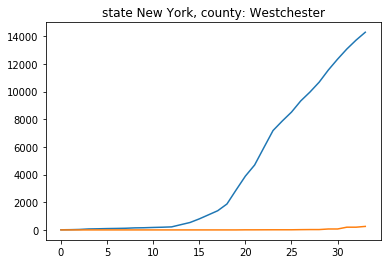

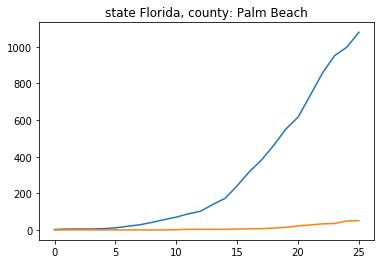

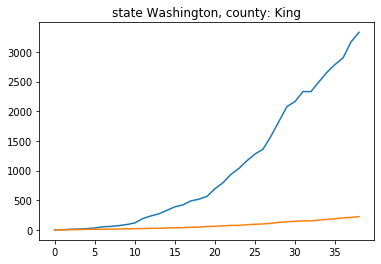

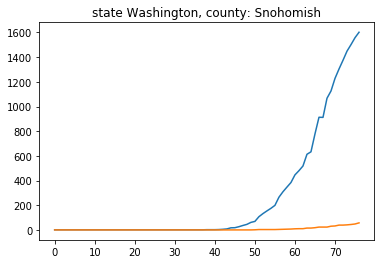

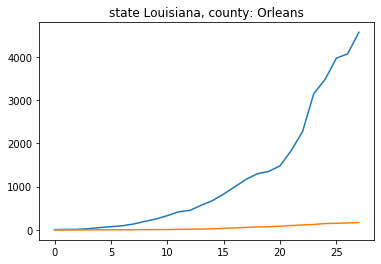

KeyboardInterrupt: 

In [9]:
ct = 0
temp = None
for cnty_id in ids:
    data = combined_df[combined_df["fips"]==cnty_id]
    
    
    county = list(data["county"])[-1]
    state = list(data["state"])[-1]
    case_data = list(data["cases"])
    death_data = list(data["deaths"])
    try:
        if case_data[-1] > 100  and death_data[-1] > 50:
            temp = case_data
            ct+=1
            plt.title("state {}, county: {}".format(state,county))
            plt.plot(case_data)
            plt.plot(death_data)
            plt.show()
    except:
        continue


In [12]:
# Normalized by population
ct = 0
temp = None
fip_data = []

for cnty_id in ids:
    data = combined_df[combined_df["fips"]==cnty_id]
    
    county = list(data["county"])[-1]
    state = list(data["state"])[-1]
    case_data = list(data["cases"])#/data["POPESTIMATE2019"])
    death_data = list(data["deaths"])#/data["POPESTIMATE2019"])
    
    log_case_data = np.log(case_data)
    log_death_data = np.log(death_data)
    try:
        #if len(death_data) > 10 and death_data[-1]>0 and death_data[-1]>0.00003:
            
        #plt.scatter(range(len(log_case_data)),log_case_data)
        #plt.title("state {}, county: {}".format(state,county))
        log_death_data = [x for x in log_death_data if x > -float("inf")]

        lr = linregress(range(len(log_death_data)), log_death_data)
       # plt.plot(log_death_data)
        #abline(lr.slope, lr.intercept)


       # print("State: {}, county: {}, slope: {}, rval: {}".format(state, county, lr.slope, lr.rvalue))

        fip_data.append((cnty_id, lr.slope, lr.rvalue))
            #plt.show()
    except:
        continue



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


In [244]:
fip_data[0]

(41003.0, 0.0, 0.0)

In [245]:
len(fip_data)

793

In [251]:
len([x for x in fip_data if x[-1] > 0.80 ])

356

In [252]:


fips = [x[0] for x in fip_data]
slopes = [x[1] for x in fip_data]
rvals = [x[2] for x in fip_data]

fip_dict = {"fip": fips, "slope":slopes, "rvals":rvals}


fip_data_df = pd.DataFrame.from_dict(fip_dict)

In [253]:
fip_data_df.head()
fip_data_df.to_csv("fip_death_rates.csv")

In [249]:
lr = linregress(range(len(test)), test)

In [250]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '-')

In [204]:
all_data = []
for x in ids[:100]:
    data = combined_df[combined_df["fips"]==x]
    
    county = list(data["county"])[-1]
    state = list(data["state"])[-1]
    case_data = list(data["cases"]/data["POPESTIMATE2019"])
    death_data = list(data["deaths"]/data["POPESTIMATE2019"])

    log_case_data = np.log(case_data)
    log_death_data = np.log(death_data)
    if log_death_data[-1] > -float("inf"):
        all_data.append(list(log_death_data))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


In [215]:
lr.rvalue

0.9580524820573947

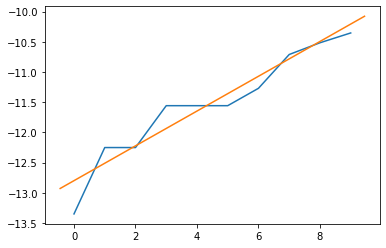

In [175]:
plt.plot(test)
abline(0.288, -12.8)

# Examine the death rate 

In [149]:
# Find days until death are 0.0001 of population
# after first death
combined_df["deaths_per_capita"] = combined_df["deaths"]/combined_df["POPESTIMATE2019"]
combined_df["cases_per_capita"] = combined_df["cases"]/combined_df["POPESTIMATE2019"]


In [15]:
combined_df.head()

,date,county,state,fips,cases,deaths,POPESTIMATE2019,deaths_per_capita
0,2020-01-21,Snohomish,Washington,53061.0,1,0,822083.0,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0,822083.0,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0,822083.0,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0,5150233.0,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0,822083.0,0.0


In [151]:
min_death_rate = 0.0001
target_counties = list(set(combined_df[(combined_df["POPESTIMATE2019"]>100000) & (combined_df["cases_per_capita"]> min_death_rate)]["fips"]))
target_counties = [x for x in target_counties if str(x) != "nan"]

In [152]:
def days_from1_to_target(county_fip, min_death_rate=min_death_rate):
    sub_df = combined_df[combined_df["fips"]==county_fip]
    sub_df = sub_df.sort_values(by="date")
    # since data is available every day, we can do this since there are no gaps
    target_region = sub_df[(sub_df["cases"] >= 1) & (sub_df["cases_per_capita"] < min_death_rate)]
    return len(target_region)

In [153]:
data = []
for fip in target_counties:
    x = days_from1_to_target(fip, min_death_rate)
    data.append(x)
    print(fip,x)

45063.0 14
45077.0 10
47125.0 13
45079.0 6
45083.0 23
45085.0 8
45091.0 11
47149.0 14
41005.0 19
47157.0 16
41017.0 17
47163.0 22
41019.0 29
47165.0 4
41029.0 26
47179.0 9
41043.0 6
47187.0 13
47189.0 8
41047.0 17
41051.0 19
39003.0 6
39017.0 18
41067.0 24
41071.0 12
39025.0 15
39029.0 9
39035.0 13
39041.0 9
39045.0 8
39049.0 13
37001.0 13
39061.0 10
37019.0 19
37021.0 14
37025.0 16
37035.0 12
39085.0 10
39089.0 9
39093.0 11
39095.0 12
35001.0 16
37049.0 20
39099.0 6
37051.0 12
39103.0 10
37057.0 10
39109.0 3
37063.0 4
39113.0 15
37067.0 18
37071.0 13
37081.0 14
39133.0 6
37085.0 15
37089.0 7
35043.0 13
39139.0 16
37097.0 12
37101.0 22
39151.0 19
39153.0 13
33011.0 12
39155.0 16
33013.0 11
33015.0 16
33017.0 8
39165.0 13
37119.0 13
39169.0 9
39173.0 9
37135.0 6
37147.0 11
37151.0 5
37159.0 9
37179.0 4
37183.0 24
37191.0 23
31055.0 38
29019.0 7
29037.0 15
29047.0 11
27003.0 25
27019.0 29
29071.0 7
29077.0 15
27037.0 18
29095.0 14
25001.0 8
25003.0 10
29099.0 7
25005.0 11
27053.0 14
2500

{'whiskers': [<matplotlib.lines.Line2D at 0x1208e3550>,
 'caps': [<matplotlib.lines.Line2D at 0x1208ecc50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1208e34d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1208fc6d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1208fcbd0>],
 'means': []}

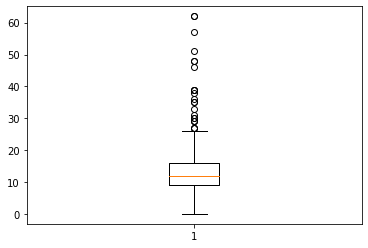

In [155]:
plt.boxplot(data)

In [ ]:
temp = [1,1,10,14,17,19,20]
grad1 = np.gradient(temp)
grad2 = np.gradient(grad1)
print(temp)
print(grad1)
print(grad2)
plt.plot(temp)
plt.plot(grad1)
plt.plot(grad2)

In [ ]:
grad2

In [ ]:
grad1

In [ ]:
def has_concavity(data):
    second_derive = np.gradient(np.gradient(data))
    for x in second_derive:
        if x < -0.1:
            return True
    return True
            

In [262]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jackduryea/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/jackduryea/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [279]:
s = "Mutations in Fas or Fas ligand block apoptosis"

In [280]:
tokens = nltk.word_tokenize(s)

In [281]:
nltk.pos_tag(tokens)

[('Mutations', 'NNS'),
 ('in', 'IN'),
 ('Fas', 'NNP'),
 ('or', 'CC'),
 ('Fas', 'NNP'),
 ('ligand', 'VBP'),
 ('block', 'NN'),
 ('apoptosis', 'NN')]